In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my1stGibbs(nchain, mu, Sigma, init):
    chain = np.zeros((nchain+1, 2))
    chain[0,:] = init
    
    for i in range(nchain):
        ## Mise a jour de la première composante
        ## La loi de proposition est donc X_1 | X_2 où X ~ MVN(mu, Sigma)
        
        ## J'utilise les formules données par wikipedia
        mu_update = mu[0] + Sigma[0,1] / Sigma[1,1] * (chain[i,1] - mu[1])
        sigma2_update = Sigma[0,0] - Sigma[0,1]**2 / Sigma[1,1]
        
        chain[i+1,0] = np.random.normal(mu_update, np.sqrt(sigma2_update))
        
        ## Mise a jour de la deuxième composante
        ## La loi de proposition est donc X_2 | X_1 où X ~ MVN(mu, Sigma)
        mu_update = mu[1] + Sigma[1,0] / Sigma[0,0] * (chain[i+1,0] - mu[0])
        sigma2_update = Sigma[1,1] - Sigma[1,0]**2 / Sigma[0,0]
        
        chain[i+1,1] = np.random.normal(mu_update, np.sqrt(sigma2_update))
        
    return chain

        

In [3]:
mu = np.array([1,-1])
Sigma = np.array([[3, 2.5], [2.5, 7]])
nchain = 10**4

chain = my1stGibbs(nchain, mu, Sigma, np.zeros(2))

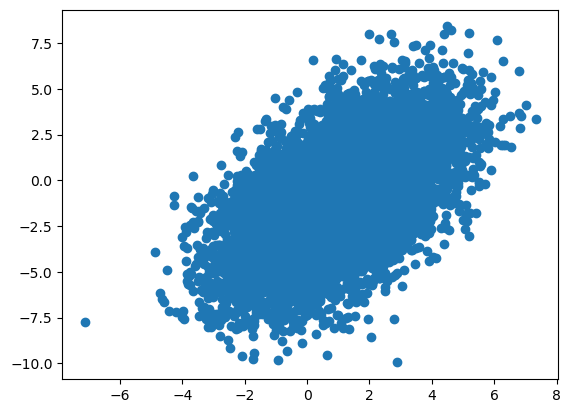

In [4]:
plt.scatter(chain[:,0], chain[:,1])

(array([  22.,  196.,  740., 1744., 2610., 2503., 1477.,  557.,  132.,
          20.]),
 array([-9.94939318, -8.11412531, -6.27885745, -4.44358958, -2.60832172,
        -0.77305385,  1.06221401,  2.89748188,  4.73274974,  6.56801761,
         8.40328547]),
 <BarContainer object of 10 artists>)

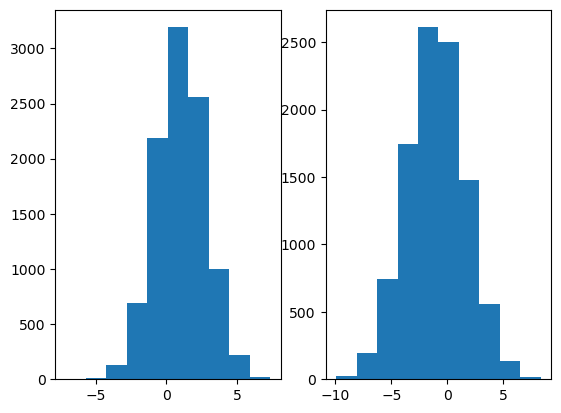

In [5]:
plt.subplot(1, 2, 1)
plt.hist(chain[:,0])
plt.subplot(1, 2, 2)
plt.hist(chain[:,1])


In [6]:
import scipy.stats as stats

In [7]:
def my1stMHWithinGibbs(nchain, mu, Sigma, init, prop_sd =[1, 1]):
    chain = np.zeros((nchain+1, 2))
    chain[0,:] = init
    acc_rate = np.zeros(2)
    
    for i in range(nchain):
        ## Mise a jour de la première composante
        ## La loi de proposition est donc X_1 | X_2 où X ~ MVN(mu, Sigma)
        
        ## J'utilise les formules données par wikipedia
        mu_update = mu[0] + Sigma[0,1] / Sigma[1,1] * (chain[i,1] - mu[1])
        sigma2_update = Sigma[0,0] - Sigma[0,1]**2 / Sigma[1,1]
        
        ## Génération d'un candidat
        prop = np.random.normal(chain[i,0], prop_sd[0])
        
        ## Calcul de la probabilité d'acceptation (noyau symétrique)
        top = stats.norm.logpdf(prop, mu_update, np.sqrt(sigma2_update))
        bottom = stats.norm.logpdf(chain[i,0], mu_update, np.sqrt(sigma2_update))
        
        acc_prob = np.exp(top - bottom)
        
        ## Mise a jour
        if np.random.uniform() < acc_prob:
            chain[i+1,0] = prop
            acc_rate[0] += 1
        else:
            chain[i+1,0] = chain[i,0]
        
        ## Mise a jour de la deuxième composante
        ## La loi de proposition est donc X_2 | X_1 où X ~ MVN(mu, Sigma)
        mu_update = mu[1] + Sigma[1,0] / Sigma[0,0] * (chain[i+1,0] - mu[0])
        sigma2_update = Sigma[1,1] - Sigma[1,0]**2 / Sigma[0,0]
        
        ## Génération d'un candidat
        prop = np.random.normal(chain[i,1], prop_sd[0])
        
        ## Calcul de la probabilité d'acceptation (noyau symétrique)
        top = stats.norm.logpdf(prop, mu_update, np.sqrt(sigma2_update))
        bottom = stats.norm.logpdf(chain[i,1], mu_update, np.sqrt(sigma2_update))
        
        acc_prob = np.exp(top - bottom)
        
        ## Mise a jour
        if np.random.uniform() < acc_prob:
            chain[i+1,1] = prop
            acc_rate[1] += 1
        else:
            chain[i+1,1] = chain[i,1]
        
    return chain, acc_rate

        

In [10]:
mu = np.array([1,-1])
Sigma = np.array([[3, 2.5], [2.5, 7]])
nchain = 10**4
chain, acc_rate = my1stMHWithinGibbs(nchain, mu, Sigma, init= np.zeros(2))

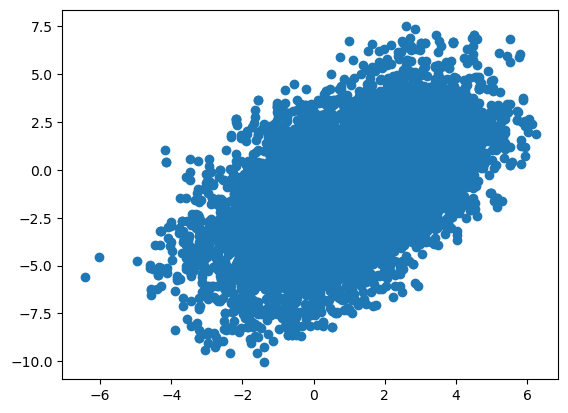

In [12]:
plt.scatter(chain[:,0], chain[:,1])